In [1]:
import pandas as pd
from collections import Counter

In [2]:
#set up colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#read the data
filename="drive/MyDrive/recipes.csv"
df=pd.read_csv(filename,error_bad_lines=False)

b'Skipping line 3: expected 13 fields, saw 29\nSkipping line 4: expected 13 fields, saw 16\nSkipping line 5: expected 13 fields, saw 28\nSkipping line 6: expected 13 fields, saw 15\nSkipping line 7: expected 13 fields, saw 15\nSkipping line 8: expected 13 fields, saw 17\nSkipping line 10: expected 13 fields, saw 21\nSkipping line 11: expected 13 fields, saw 25\nSkipping line 12: expected 13 fields, saw 14\nSkipping line 14: expected 13 fields, saw 23\nSkipping line 15: expected 13 fields, saw 25\nSkipping line 16: expected 13 fields, saw 23\nSkipping line 19: expected 13 fields, saw 28\nSkipping line 22: expected 13 fields, saw 26\nSkipping line 23: expected 13 fields, saw 20\nSkipping line 24: expected 13 fields, saw 17\nSkipping line 25: expected 13 fields, saw 19\nSkipping line 26: expected 13 fields, saw 16\nSkipping line 31: expected 13 fields, saw 21\nSkipping line 32: expected 13 fields, saw 26\nSkipping line 33: expected 13 fields, saw 23\nSkipping line 36: expected 13 fields, 

In [4]:
#see how the data looks like
df.head()
#we can see that the rows are not read correcctly, because the separating character seems to be ';' instead of ','

,,,,,,,,,,,,Recipe Name;Review Count;Recipe Photo;Author;Prepare Time;Cook Time;Total Time;Ingredients;Directions;RecipeID
Golden Crescent Rolls Recipe ;304;https://images.media-allrecipes.com/userphotos/560x315/4465807.jpg;Mike A.;25 m;15 m;3 h 10 m;yeast,water,white sugar,salt,egg,butter,flour,butter;Dissolve yeast in warm water.**Stir in sugar,salt,eggs,butter,and 2 cups of flour. Beat until smooth. Mix in remaining flour until smooth. Scrape dough from side of bowl. Knead dough,then cover it and let rise in a warm place un...
Cottage Cheese Bread II Recipe ;27;https://images.media-allrecipes.com/userphotos/560x315/3129162.jpg;Kathy Nowell;5 m;3 h;3 h 5 m;water,cottage cheese,vegetable oil,egg,flour,white sugar,baking soda,salt,yeast;Add the ingredients to the pan of your bread machine in the order suggested by the manufacturer,and Start. You can use more bread flour if the dough seems too sticky.**;7012,NaN,NaN,NaN
French Toast I Recipe ;1k;https://images.media-allrecipes.com/userphotos/560x315/234562.jpg;Jan Bittner;5 m;15 m;20 m;bread,egg,milk,cinnamon,nutmeg,vanilla,salt;Beat together egg,milk,salt,desired spices and vanilla.**Heat a lightly oiled griddle or skillet over medium-high heat.**Dunk each slice of bread in egg mixture,soaking both sides. Place in pan,and cook on both sides until golden. Serve hot.**;7016,NaN
Indian Naan II Recipe ;107;https://images.media-allrecipes.com/userphotos/250x250/96729.jpg;Michelle Chen;25 m;20 m;2 h 25 m;water,yeast,white sugar,flour,salt,ghee,yogurt,onion;Whisk the warm water with the yeast and sugar until the yeast is dissolved. Cover and let stand in a warm place for 10 minutes.**Sift flour and salt three times into a large bowl add the yeast mixture,half of the ghee and all the yogurt. Mix into a soft dough then knead on a floured surface for about 5 minutes or until dough is smooth and elastic. Place the dough in a large greased bowl,cover and let stand in a warm place for 1 1/2 hours or until the dough is doubled in size .**Punch down dough then knead for 5 minutes. Divide dough into 6 pieces. Roll each piece out into 8 inch round naans.**Cover an oven tray with foil and grease the foil. Brush the naan with a little of the remaining ghee and sprinkle with some of the kalonji. Cook naan one at a time under the broiler for about 2 minutes on each side or until puffed and just browned.**;7021,NaN,NaN,NaN
Lefse II Recipe ;12;https://images.media-allrecipes.com/userphotos/560x315/996053.jpg;Brent;15 m;45 m;1 h;buttermilk,corn syrup,white sugar,baking soda,cardamom,flour;In a large bowl,mix by hand sour milk or buttermilk,corn syrup,sugar,soda,cardamom,and flour until mixture becomes a soft pliable dough.**Divide the dough into 12 or so pieces. Roll out each piece until about 1/8 inch thick.**Bake on a lightly floured griddle over very low heat for 12 to 15 minutes per side. Serve warm with your favorite cheese or jam.**;7022,NaN


In [5]:
#so let's read the data again, this time specifying the right separator
df=pd.read_csv(filename,sep=';')

In [6]:
#when looking at the dataframe, we can see that everything is read correctly
df.head()

,Recipe Name,Review Count,Recipe Photo,Author,Prepare Time,Cook Time,Total Time,Ingredients,Directions,RecipeID
0,Golden Crescent Rolls Recipe,304,https://images.media-allrecipes.com/userphotos...,Mike A.,25 m,15 m,3 h 10 m,"yeast,water,white sugar,salt,egg,butter,flour,...","Dissolve yeast in warm water.**Stir in sugar, ...",7000
1,Poppy Seed Bread with Glaze Recipe,137,https://images.media-allrecipes.com/userphotos...,Christina Jun,15 m,1 h,1 h 20 m,"flour,salt,baking powder,poppy,butter,vegetabl...",'Preheat oven to 350 degrees F (175 degrees C)...,7001
2,Applesauce Bread I Recipe,124,https://images.media-allrecipes.com/userphotos...,GAF55,10 m,1 h 20 m,1 h 30 m,"flour,egg,white sugar,vegetable oil,applesauce...",Preheat oven to 350 degrees F (175 degrees C)....,7003
3,Apple Raisin Bread Recipe,39,https://images.media-allrecipes.com/userphotos...,Helen Hanson,15 m,1 h,1 h 15 m,"flour,baking powder,baking soda,salt,cinnamon,...",Preheat oven to 350 degrees F (175 degrees C)....,7006
4,Buttermilk Oatmeal Bread Recipe,41,https://images.media-allrecipes.com/userphotos...,Helen Hanson,10 m,1 h,1 h 40 m,"oat,buttermilk,vegetable oil,egg,brown sugar,f...",Mix oats with buttermilk. Let stand for 1/2 h...,7007


In [7]:
#let's see some statistics about our data
df.describe(include="all")
#we can see that we have 12351 recipes, but since the data is mostly text, some of the statistical information cannot be computed

,Recipe Name,Review Count,Recipe Photo,Author,Prepare Time,Cook Time,Total Time,Ingredients,Directions,RecipeID
count,12351,12351,12351,12351,12351,12351,12351,12351,12345,12351.000000
unique,11964,741,11248,6582,73,110,301,12097,12184,NaN
top,Old,4,https://images.media-allrecipes.com/images/795...,sal,X,X,X,"flour,salt,shortening,water",'Preheat oven to 350 degrees F (175 degrees C).,NaN
freq,17,347,971,274,4156,5877,4091,4,5,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16149.829326
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5745.770833
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11150.500000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15564.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20889.500000


In [8]:
#let's inspect the shape of the df, it should have 12351 rows
df.shape
#that's correct, and we can see that we have 10 columns

(12351, 10)

### Preprocessing

For preprocessing, we are mostly interested in dealing with missing data. There might be errors in the text, but we are supposed to make the AI take them into account to and deal with them, so we won't remove or fix them.

In [9]:
#check for NaN values
df.isnull().values.any()

True

In [10]:
#it seems like we have missing values, let's see in how many rows
df.isnull().values.sum()

6

In [11]:
#now let's take a look at these rows and decide how we might fix them
missing_data=df[df.isnull().any(axis=1)]
missing_data

,Recipe Name,Review Count,Recipe Photo,Author,Prepare Time,Cook Time,Total Time,Ingredients,Directions,RecipeID
292,Sunshine Cake Recipe,9,https://images.media-allrecipes.com/userphotos...,Helga,X,X,X,"egg,white sugar,water,flour,baking powder,salt...",NaN,7378
3818,Cherry Pie I Recipe,11,https://images.media-allrecipes.com/userphotos...,Cali,X,X,X,"vanilla,gelatin,water,cherry,white sugar,corns...",NaN,12251
4320,Quick Clam Chowder Recipe,42,https://images.media-allrecipes.com/userphotos...,Lew Sweet,X,X,X,"england,potato,celery,clam,onion,celery,margar...",NaN,12981
6238,Hot Clam Dip II Recipe,30,https://images.media-allrecipes.com/userphotos...,lara,X,X,X,"bread,cream cheese,onion,beer,worcestershire s...",NaN,15648
9330,Chocolate Sausage (Salame di Cioccolato) Recipe,2,https://images.media-allrecipes.com/images/795...,Manuela,X,X,X,"white sugar,egg,egg,butter,cocoa powder,cookie...",NaN,21002
10676,Oatmeal Kiss Cookies Recipe,6,https://images.media-allrecipes.com/userphotos...,HersheysKitchens.com,X,X,X,"chocolate,butter,shortening,white sugar,brown ...",NaN,24031


In [12]:
#Since the missing values occur in the "Directions" column, which will be our imput, we cannot use these rows
#since this happens for just 6 rows out of 12351, we can safely remove them
df=df.drop(missing_data.index)
#let's make sure that the rows were indeed deleted
df.shape
#everything seems to be fine

(12345, 10)

In [13]:
#check for " " values
df['Directions'].str.contains(' ').sum()

12345

In [14]:
#check how many unique directions there are
len(df['Directions'].unique())

12184

In [15]:
#looks like we might have some duplicates
len(df['Recipe Name'].unique())

11958

In [16]:
#let's see if there are duplicate rows
duplicateRows = df[df.duplicated()]
print(duplicateRows)
#it seems that there are no duplicated rows in the dataframe. 

Empty DataFrame
Columns: [Recipe Name, Review Count, Recipe Photo, Author, Prepare Time, Cook Time, Total Time, Ingredients, Directions, RecipeID]
Index: []


In [17]:
df['Recipe Name'].duplicated().sum()

387

In [18]:
df['Directions'].duplicated().sum()
#However, we have some duplicated Directions and Recipe names, so we should investigate this issue futher

161

In [19]:
df[df.duplicated(['Recipe Name'])]

,Recipe Name,Review Count,Recipe Photo,Author,Prepare Time,Cook Time,Total Time,Ingredients,Directions,RecipeID
278,Old,10,https://images.media-allrecipes.com/userphotos...,Winona,30 m,30 m,1 h,"raisin,water,shortening,egg,flour,cinnamon,nut...",Preheat oven to 350 degrees F (175 degrees C)....,7363
373,Coco,80,https://images.media-allrecipes.com/userphotos...,sassysquirrel,X,X,X,"flour,egg,white sugar,baking soda,vanilla,butt...",'Combine flour and white sugar in mixing bowl....,7502
521,Self,23,https://images.media-allrecipes.com/userphotos...,Cathy,X,X,X,"cake,cream cheese,white sugar,egg,salt,chocolate",Preheat oven to 350 degrees F (175 degrees C)....,7729
685,Coco,43,https://images.media-allrecipes.com/userphotos...,Robin,X,X,X,"white sugar,flour,cola,cocoa powder,butter,but...",'Preheat oven to 350 degrees F (175 degrees C)...,7967
805,Gluten,217,https://images.media-allrecipes.com/userphotos...,Amy,X,X,X,"flour,tapioca,salt,baking soda,baking powder,t...",Preheat oven to 350 degrees F (175 degrees C)....,8139
...,...,...,...,...,...,...,...,...,...,...
12149,Cocktail Meatballs II Recipe,51,https://images.media-allrecipes.com/userphotos...,Jordanna,30 m,30 m,1 h,"ground beef,bread,milk,black pepper,parsley,on...","In a large bowl, combine the ground beef, dry ...",26597
12158,No,95,https://images.media-allrecipes.com/userphotos...,Lovesmurfs,28 m,8 h,8 h 28 m,"beef,onion,mushroom,mushroom,red wine","Place beef stew meat, condensed French onion s...",26632
12255,Shrimp Dip Recipe,11,https://images.media-allrecipes.com/userphotos...,THEMCRAES,30 m,X,1 h 30 m,"cream cheese,ketchup,horseradish,shrimp","In a medium bowl, mix the cream cheese, ketchu...",26955
12281,Hot Chocolate Mix II Recipe,26,https://images.media-allrecipes.com/userphotos...,Debby,5 m,X,5 m,"milk,white sugar,cocoa powder","Sift together milk powder, white sugar and coc...",27105


In [20]:
df[df.duplicated(['Directions'])]

,Recipe Name,Review Count,Recipe Photo,Author,Prepare Time,Cook Time,Total Time,Ingredients,Directions,RecipeID
61,Sourdough Wheat Bread Recipe,16,https://images.media-allrecipes.com/userphotos...,Mari,5 m,3 h,3 h 5 m,"sourdough,water,margarine,white sugar,salt,who...",Add ingredients in order suggested by your man...,7085
1711,Apricot Fruitcake Recipe,9,https://images.media-allrecipes.com/userphotos...,Carol,X,X,X,"apricot,water,butter,white sugar,egg,raisin,ch...",Preheat oven to 275 degrees F (135 degrees C)....,9262
1712,Best Boiled Fruitcake Recipe,50,https://images.media-allrecipes.com/userphotos...,Mark Richards,X,X,X,"fruit,cherry,citrus,walnut,butter,spice,baking...",Preheat oven to 325 degrees F (160 degrees C)....,9263
1713,Carrot Fruit Ring Recipe,8,https://images.media-allrecipes.com/images/795...,Carol,X,X,X,"vegetable oil,white sugar,brown sugar,egg,carr...",Preheat oven to 325 degrees F (165 degrees C)....,9264
1714,Christmas Cherry Cake Recipe,11,https://images.media-allrecipes.com/userphotos...,Carol,X,X,X,"white sugar,butter,egg,orange juice,flour,baki...",'Preheat oven to 300 degrees F (150 degrees C)...,9266
...,...,...,...,...,...,...,...,...,...,...
9139,Glazed Meatloaf II Recipe,738,https://images.media-allrecipes.com/userphotos...,Delia,10 m,1 h 10 m,1 h 20 m,"ketchup,brown sugar,lemon juice,mustard,ground...",'Preheat oven to 350 degrees F (175 degrees C).,20673
9343,Zucchini Casserole II Recipe,192,https://images.media-allrecipes.com/userphotos...,Bea Gassman,15 m,25 m,40 m,"zucchini,mushroom,sour cream,onion,carrot,brea...",Preheat oven to 350 degrees F (175 degrees C)....,21035
10773,Stuffed Zucchini Recipe,510,https://images.media-allrecipes.com/userphotos...,LTHASKINS,10 m,1 h,1 h 10 m,"zucchini,sausage,bread,garlic,spaghetti,parmes...",'Preheat oven to 350 degrees F (175 degrees C).,24162
10823,Calico Bean Casserole Recipe,264,https://images.media-allrecipes.com/userphotos...,Dee Dee,20 m,30 m,50 m,"bean,bake,butter,ketchup,vinegar,mustard,brown...",'Preheat oven to 350 degrees F (175 degrees C).,24224


In [21]:
#Although some recipes seem to have funny names like "Self" or "Coco", we should still keep them because they 
#might contain valuable information still.
#Same situation with the Directions, looks like some recipes have the same directions, but the ingredient lists seem to
#be different, so we shouldn't discard them

#Now let's examine the directions and corresponding ingredients

In [22]:
df.loc[df.index[1], 'Directions']

"'Preheat oven to 350 degrees F (175 degrees C). Grease bottoms of two 9-inch loaf pans.**Mix together flour, salt, baking powder, poppy seeds, butter flavoring, oil, eggs, milk, sugar, vanilla, and almond flavoring. Pour into prepared pans.**Bake at 350 degrees F (175 degrees C) for one hour. Cool 5 minutes. Poke holes in top of loaves and pour glaze over.**To make glaze: Mix orange juice, 1/2 teaspoon butter flavoring, 1/2 teaspoon almond flavoring, and 1 teaspoon vanilla. Add enough confectioners'' sugar to make glaze.**'"

In [23]:
df.loc[df.index[1], 'Ingredients']

'flour,salt,baking powder,poppy,butter,vegetable oil,egg,milk,white sugar,vanilla,almond,orange juice,butter,almond,vanilla,sugar'

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 153 missing from current font.
  font.set_text(s, 0, flags=flags)


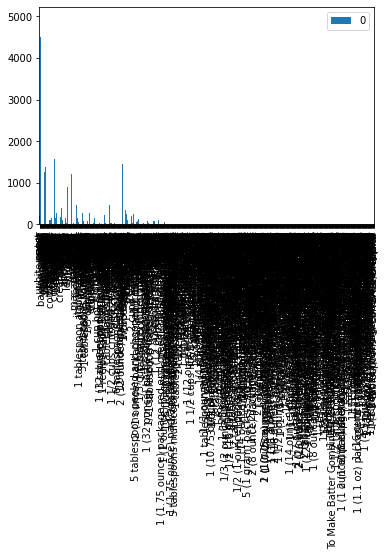

In [24]:
#let's get some information about the ingredients, so let's plot their counts
ingredients = []

for i in df["Ingredients"]:
    for j in i.split(","):
        ingredients.append(j)

count = Counter(ingredients)
df_plot = pd.DataFrame.from_dict(count, orient='index')
df_plot.plot(kind='bar')

In [25]:
#let's get the most frequent ingredients
df_plot=df_plot.sort_values(df_plot.columns[0],ascending=False)
df_plot.head(300)

,0
white sugar,4982
egg,4876
salt,4513
butter,4454
flour,4156
...,...
marsala,14
corn oil,14
cantaloupe,13
goat cheese,13


By looking at the most common ingredients we can see that the recipes seem to be from cakes/baked items mostly. At some point we can see that the ingredients tend so be very very specific (like the last one here).

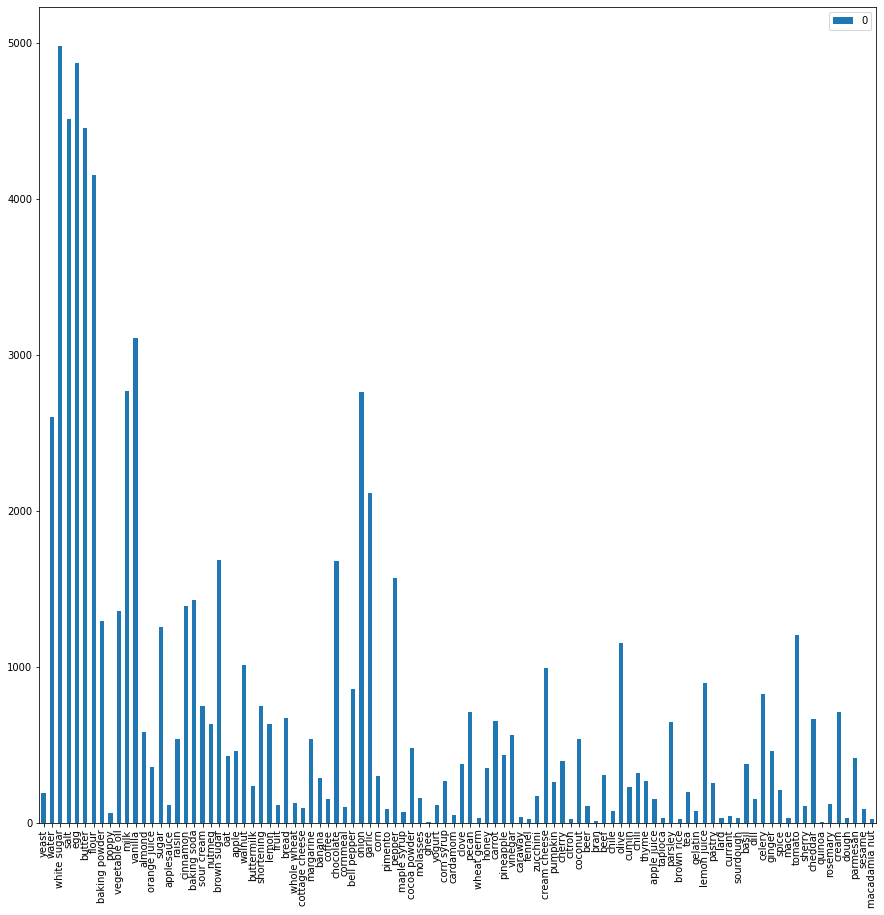

In [26]:
df_plot = pd.DataFrame.from_dict(count, orient='index')
df_plot.head(100).plot(kind='bar',figsize=(15,15))

### Training


The main idea would be to generate labels for each word in a recipe, which say if it is an ingredient or not. Then we will use a sequence-to-sequence neural network to tag every word. Then we pseudo-label the training set and update the model with the new labels.

In [27]:
#we start by splitting the data into training and testing, ratio 80/20
test_df = df[9876:]
#test_df = df[1000:1200]
test_df.shape

(2469, 10)

In [28]:
train_df=df[0:9876]
#train_df=df[0:1000]
train_df.shape

(9876, 10)

In [29]:
#next we will use the library spacy to tokenize the text
# !pip install spacy
# !python -m spacy download en_core_web_sm

In [30]:
#next we will create a preprocessing function for the Directions column, to remove stopwords, special characters, numbers etc.
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)

i=3431
preprocess(df.loc[df.index[i], 'Directions'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'preheat oven degrees degrees beat egg whites electric mixer soft peaks form gradually add sugar beat stiff peaks form fold pecans chocolate chips drop teaspoonfuls onto prepared cookie sheet put cookies preheated oven turn oven keeping door shut open door next morning cookies done best bedtime waiting easier'

In [31]:
#run the tokenizer on all instructions
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'tagger', 'ner'])

In [32]:
#we build a vocabulary with the known tokens
tokenized = [nlp(t) for t in train_df["Directions"].values]


In [33]:
#Now let's get the number of unique tokens
vocab = {"<UNK>": 1, "<PAD>": 0}
for txt in tokenized:
    for token in txt:
        if token.text not in vocab.keys():
            vocab[token.text] = len(vocab)
print("Number of unique tokens: {}".format(len(vocab)))


Number of unique tokens: 13886


In [34]:
#apply the preprocessing function on each row from df["Directions"]
for i in range(0,len(train_df)):
  train_df.loc[train_df.index[i], 'Directions']=preprocess(train_df.loc[df.index[i], 'Directions'])



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [35]:
#split the ingredients by ',' for each row
train_df["Processed_ingredients"]=""
for i in range(0,len(train_df)):
  train_df.at[train_df.index[i], 'Processed_ingredients']=train_df.at[train_df.index[i], 'Ingredients'].split(",")

# #now, using the ingredients list, we will create the labels
ingredients = train_df["Processed_ingredients"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [36]:
for i in range(0,10):
  print(train_df.loc[train_df.index[i], 'Processed_ingredients'])

['yeast', 'water', 'white sugar', 'salt', 'egg', 'butter', 'flour', 'butter']
['flour', 'salt', 'baking powder', 'poppy', 'butter', 'vegetable oil', 'egg', 'milk', 'white sugar', 'vanilla', 'almond', 'orange juice', 'butter', 'almond', 'vanilla', 'sugar']
['flour', 'egg', 'white sugar', 'vegetable oil', 'applesauce', 'raisin', 'cinnamon', 'baking soda', 'baking powder', 'sour cream']
['flour', 'baking powder', 'baking soda', 'salt', 'cinnamon', 'nutmeg', 'brown sugar', 'oat', 'apple', 'walnut', 'raisin', 'egg', 'milk', 'vegetable oil']
['oat', 'buttermilk', 'vegetable oil', 'egg', 'brown sugar', 'flour', 'baking powder', 'baking soda', 'salt']
['shortening', 'white sugar', 'salt', 'milk', 'egg', 'lemon', 'yeast', 'flour', 'fruit']
['shortening', 'water', 'brown sugar', 'yeast', 'water', 'white sugar', 'salt', 'bread', 'whole wheat']
['water', 'cottage cheese', 'vegetable oil', 'egg', 'flour', 'white sugar', 'baking soda', 'salt', 'yeast']
['margarine', 'white sugar', 'egg', 'banana', '

In [37]:
#preprocessing functions to clean ingredients lists from stopwords, numbers, etc.
def _filter(token):
    if len(token) < 2:
        return False
    if token.is_stop:
        return False
    if token.text[0].islower():
        return False
    if token.is_digit:
        return False
    if token.like_num:
        return False
    return True

def _clean(text):
    text = text.replace("(", "")
    text = text.split("/")[0]
    return text

#function to generate the labels for our ingredients
def get_labels(ingredients, tokenized_instructions):
    labels = []
    for ing, ti in zip(ingredients, tokenized_instructions):
        l_i = []
        ci = [_clean(t.text) for i in ing for t in nlp(i) if _filter(t) and len(_clean(t.text)) >= 2]
        label = []
        for token in ti:
            l_i.append(any((c == token.text or c == token.text[:-1] or c[:-1] == token.text) for c in ci))
        labels.append(l_i)
    return labels

def get_labels2(ingredients, tokenized_instructions):
    labels = []
    for ing, ti in zip(ingredients, tokenized_instructions):
      l_i = []
      for i in ti:
        #print(i,ing,type(ti))
        # cond=False
        # for j in ing:
        #   if(i==j.text):
        #     cond=True
        if (str(i) in ing):
          l_i.append(True)
        else:
          l_i.append(False)
      labels.append(l_i)
    return labels

labels = get_labels2(ingredients, tokenized)

In [38]:
#check our function
set([t.text for t, l in zip(tokenized[1], labels[1]) if l])

{'almond', 'butter', 'flour', 'milk', 'poppy', 'salt', 'sugar', 'vanilla'}

Next we will define our LSTM network. First we need to look at the length of our recipes, to determine the padding length for the inputs of our network.

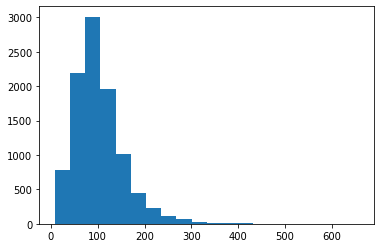

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist([len([t for t in tokens]) for tokens in tokenized], bins=20);

In [40]:
#now we pick a maximum number of tokens, let's say 400
MAX_LEN = 400

In [41]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# now let's pad the sequences and map the words to integers
def prepare_sequences(texts, max_len, vocab={"<UNK>": 1, "<PAD>": 0}):
    X = [[vocab.get(w.text, vocab["<UNK>"]) for w in s] for s in texts]
    return pad_sequences(maxlen=max_len, sequences=X, padding="post", value=vocab["<PAD>"])

X_seq = prepare_sequences(tokenized, max_len=MAX_LEN, vocab=vocab)


In [42]:
#let's see how a random sequence looks like
X_seq[39]

array([ 63,  58, 137, 166,   4,  58, 226, 256, 248,   4,  58, 257, 258,
       259,  58, 260,  17, 137, 521, 570, 601, 520,   8,  12,  29, 505,
       647,  58, 103,  54, 253, 254, 255,  17,  94,  94,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [43]:
import numpy as np

#let's also set up the y labels
y_seq = []
for l in labels:
    y_i = []
    for i in range(MAX_LEN):
        try:
            y_i.append(float(l[i]))
        except:
            y_i.append(0.0)
    y_seq.append(np.array(y_i))
y_seq = np.array(y_seq)
y_seq = y_seq.reshape(y_seq.shape[0], y_seq.shape[1], 1)

In [44]:
import tensorflow as tf
from tensorflow.keras import layers


#now we can define the network, which is a simple 2-layer LSTM-based sequence tagger
model = tf.keras.Sequential()
model.add(layers.Embedding(input_dim=len(vocab), mask_zero=True, output_dim=50))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.Bidirectional(layers.LSTM(units=64, return_sequences=True)))
model.add(layers.SpatialDropout1D(0.2))
model.add(layers.Bidirectional(layers.LSTM(units=64, return_sequences=True)))
model.add(layers.TimeDistributed(layers.Dense(1, activation='sigmoid')))


In [45]:
#add an optimizer
model.compile(optimizer=tf.optimizers.Adam(0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [46]:
#let's see a summary for our model
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 50)          694300    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, None, 50)          0         
_________________________________________________________________
bidirectional (Bidirectional (None, None, 128)         58880     
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, None, 128)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         98816     
_________________________________________________________________
time_distributed (TimeDistri (None, None, 1)           129       
Total params: 852,125
Trainable params: 852,125
Non-trainable params: 0
__________________________________________________

In [47]:
#let's fit the model
history = model.fit(X_seq, y_seq, epochs=10, batch_size=256, validation_split=0.1)


Epoch 1/10
35/35 [==============================] - 42s 545ms/step - loss: 0.0866 - accuracy: 0.9364 - val_loss: 0.0501 - val_accuracy: 0.9380
Epoch 2/10
35/35 [==============================] - 13s 378ms/step - loss: 0.0554 - accuracy: 0.9432 - val_loss: 0.0441 - val_accuracy: 0.9379
Epoch 3/10
35/35 [==============================] - 12s 331ms/step - loss: 0.0456 - accuracy: 0.9427 - val_loss: 0.0341 - val_accuracy: 0.9381
Epoch 4/10
35/35 [==============================] - 12s 331ms/step - loss: 0.0300 - accuracy: 0.9527 - val_loss: 0.0139 - val_accuracy: 0.9794
Epoch 5/10
35/35 [==============================] - 12s 330ms/step - loss: 0.0112 - accuracy: 0.9845 - val_loss: 0.0083 - val_accuracy: 0.9832
Epoch 6/10
35/35 [==============================] - 12s 330ms/step - loss: 0.0092 - accuracy: 0.9865 - val_loss: 0.0077 - val_accuracy: 0.9850
Epoch 7/10
35/35 [==============================] - 12s 332ms/step - loss: 0.0086 - accuracy: 0.9875 - val_loss: 0.0073 - val_accuracy: 0.9857

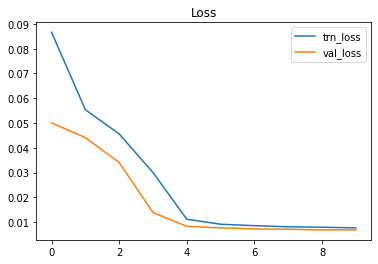

In [48]:
#plot loss
plt.plot(history.history["loss"], label="trn_loss");
plt.plot(history.history["val_loss"], label="val_loss");
plt.legend();
plt.title("Loss");


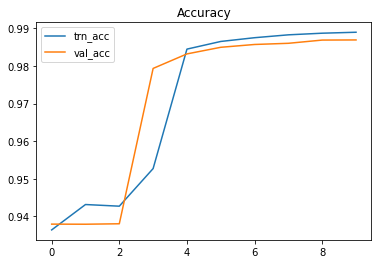

In [49]:
#plot accuracy
plt.plot(history.history["accuracy"], label="trn_acc");
plt.plot(history.history["val_accuracy"], label="val_acc");
plt.legend();
plt.title("Accuracy");

In [50]:
#let's now analyze some predictions of the model
y_pred = model.predict(X_seq, verbose=1, batch_size=1024)


10/10 [==============================] - 8s 246ms/step


In [51]:
i = 332
pred_i = y_pred[i] > 0.05
print(tokenized[i])


ingreds = [t.text for t, p in zip(tokenized[i], pred_i) if  not p]
print(set(ingreds))


'In a large bowl, blend together butter or margarine, white sugar, 1/2 cup brown sugar, sour cream, eggs, and vanilla.  Add to these ingredients the flour, baking powder, and soda.  Blend until smooth.**To Make Filling:  Combine cinnamon and 1/4 cup brown sugar.**Grease and flour a large Bundt pan.  Pour 1/2 of the batter into the prepared pan.  Sprinkle the cinnamon sugar mix on top of the batter in the pan, and cover with the remaining batter.**Bake at 350 degrees F (175 degrees C) for 45 to 50 minutes.  Cool.**Make a thick glaze by mixing together confectioners'' sugar with 2 to 3 tablespoons milk until smooth.  Pour over cooled cake, and add sprinkles if desired.**'
{'ingredients', 'cup', 'sugar', "'", 'brown', 'sour', 'cover', 'to', 'thick', 'degrees', '*', '1/4', ')', 'mix', '350', 'F', 'top', 'Bundt', 'smooth', 'confectioners', 'together', 'the', 'blend', 'Cool.**Make', 'C', 'soda', 'glaze', 'Filling', 'Add', 'with', 'Combine', 'mixing', ':', 'large', '(', 'these', 'baking', 'ba

### Evaluate the test data

In [54]:
#apply the preprocessing function on each row from df["Directions"]
for i in range(0,2469):
  test_df.at[test_df.index[i], 'Directions']=preprocess(test_df.at[test_df.index[i], 'Directions'])




In [56]:
test_df["Processed_ingredients"]=""
for i in range(0,2469):
  test_df.at[test_df.index[i], 'Processed_ingredients']=test_df.at[test_df.index[i], 'Ingredients'].split(",")


eval_ingredients = test_df['Processed_ingredients'].values
eval_tokenized = [nlp(t) for t in test_df.Directions.values]

labels_test = get_labels2(eval_ingredients, tokenized)

X_seq_test = prepare_sequences(eval_tokenized, max_len=MAX_LEN, vocab=vocab)

y_seq = []
for l in labels_test:
    y_i = []
    for i in range(MAX_LEN):
        try:
            y_i.append(float(l[i]))
        except:
            y_i.append(0.0)
    y_seq.append(np.array(y_i))
y_seq = np.array(y_seq)
y_seq = y_seq.reshape(y_seq.shape[0], y_seq.shape[1], 1)


y_pred_test = model.predict(X_seq_test, verbose=1, batch_size=1024)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


3/3 [==============================] - 1s 198ms/step


In [57]:
#let's check the results for a random prediction
i = 893
pred_i = y_pred_test[i] > 0.05
print()

ingreds = [t.text for t, p in zip(eval_tokenized[i], pred_i) if p]
print(eval_tokenized[i])
print(set(ingreds))

#looks like the results are decent, the model identified some of the ingredients, although not all of them


blender food processor puree basil leaves olive oil garlic mix pine nuts parmesan cheese continue processing desired consistency reached preheat broiler slice italian bread desired thickness spread layer pesto slice top roma plum tomatoes mozzarella cheese place topped bread slices single layer large baking sheet broil minutes cheese bubbly lightly browned
{'olive', 'cheese', 'parmesan', 'basil', 'mozzarella', 'plum', 'garlic', 'bread'}


In [58]:
#check the accuracy on the test set
score, acc = model.evaluate(X_seq_test, y_seq, batch_size=256)
print('Test score:', score)
print('Test accuracy:', acc)

10/10 [==============================] - 1s 91ms/step - loss: 0.0489 - accuracy: 0.8740
Test score: 0.04891388863325119
Test accuracy: 0.8739850521087646


In [61]:
#save model
model.save('my_foodstyles_model.h5')

In [84]:
eval_tokenized2 = [nlp(t) for t in ["boil the eggs and add cheese and cream", "add flour butter beat egg cook for one hour"]]

#labels_test = get_labels2(eval_ingredients, tokenized)

X_seq_test2 = prepare_sequences(eval_tokenized2, max_len=MAX_LEN, vocab=vocab)

y_pred_test = model.predict(X_seq_test2, verbose=1, batch_size=1024)
pred_i = y_pred_test[1] > 0.05

ingreds = [t.text for t, p in zip(eval_tokenized2[0], pred_i) if p]
print(eval_tokenized2[0])
print(set(ingreds))

1/1 [==============================] - 0s 23ms/step
boil the eggs and add cheese and cream
{'eggs', 'the', 'cheese', 'add', 'boil', 'and'}


### Inference

I will load the saved model and perform inference in the specified way, returning the specified output.

In [65]:
model1 = tf.keras.models.load_model('my_foodstyles_model.h5')

In [90]:

def inference(sentence):
  eval_tokenized2 = [nlp(t) for t in [sentence]]

  labels_test = get_labels2(eval_ingredients, tokenized)

  X_seq_test2 = prepare_sequences(eval_tokenized2, max_len=MAX_LEN, vocab=vocab)

  y_pred_test = model1.predict(X_seq_test2, verbose=1, batch_size=1024)
  pred_i = y_pred_test[0] > 0.05

  ingreds = [t.text for t, p in zip(eval_tokenized2[0], pred_i) if p]

  res=[]
  
  for i in ingreds:
    res_line=[]
    res_line.append(i)
    res_line.append(sentence.find(i))
    res_line.append(sentence.find(i)+len(i))
    res.append(res_line)

  return res


# print(eval_tokenized2[0])
# print(set(ingreds))


print(inference("mix flour butter beat egg cook for one hour"))
print(inference("boil pasta use spatula add sauce"))

1/1 [==============================] - 0s 32ms/step
[['mix', 0, 3], ['flour', 4, 9], ['butter', 10, 16], ['beat', 17, 21], ['egg', 22, 25], ['cook', 26, 30]]
1/1 [==============================] - 0s 23ms/step
[['boil', 0, 4], ['pasta', 5, 10], ['use', 11, 14], ['sauce', 27, 32]]
